In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('People_Clean_Data.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11991 entries, 0 to 11990
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfactoryLevel      11991 non-null  float64
 1   lastEvaluation         11991 non-null  float64
 2   numberOfProjects       11991 non-null  int64  
 3   avgMonthlyHours        11991 non-null  int64  
 4   timeSpent.company      11991 non-null  int64  
 5   workAccident           11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotionInLast5years  11991 non-null  int64  
 8   salary                 11991 non-null  int64  
 9   salary_encoded         11991 non-null  int64  
 10  dept_RandD             11991 non-null  int64  
 11  dept_accounting        11991 non-null  int64  
 12  dept_hr                11991 non-null  int64  
 13  dept_management        11991 non-null  int64  
 14  dept_marketing         11991 non-null  int64  
 15  de

In [3]:

# df.drop(['dept_RandD', 'dept_accounting', 'dept_hr', 'dept_management', 
#         'dept_marketing', 'dept_product_mng', 'dept_sales', 'dept_support', 
#             'dept_technical'], axis=1)


In [5]:
df.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,salary,salary_encoded,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,0.38,0.53,2,157,3,0,1,0,1,1,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,2,2,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,2,2,0,0,0,0,0,0,1,0,0
3,0.37,0.52,2,159,3,0,1,0,1,1,0,0,0,0,0,0,1,0,0
4,0.41,0.50,2,153,3,0,1,0,1,1,0,0,0,0,0,0,1,0,0


In [6]:
df.isnull().sum()

satisfactoryLevel        0
lastEvaluation           0
numberOfProjects         0
avgMonthlyHours          0
timeSpent.company        0
workAccident             0
left                     0
promotionInLast5years    0
salary                   0
salary_encoded           0
dept_RandD               0
dept_accounting          0
dept_hr                  0
dept_management          0
dept_marketing           0
dept_product_mng         0
dept_sales               0
dept_support             0
dept_technical           0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.drop(columns=['salary_encoded'],axis=1)

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,salary,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,2,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,2,0,0,0,0,0,0,1,0,0
3,0.37,0.52,2,159,3,0,1,0,1,0,0,0,0,0,0,1,0,0
4,0.41,0.50,2,153,3,0,1,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11986,0.30,0.88,5,245,4,0,0,0,1,0,0,1,0,0,0,0,0,0
11987,0.99,0.83,4,274,2,0,0,0,1,0,0,0,0,0,0,1,0,0
11988,0.72,0.72,4,175,4,0,0,0,1,0,0,0,0,0,0,0,0,1
11989,0.24,0.91,5,177,5,0,0,0,1,0,0,0,0,0,0,1,0,0


In [9]:
df.corr()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,salary,salary_encoded,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
satisfactoryLevel,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,-0.350558,0.019789,0.007216,0.007216,-0.002552,-0.021056,-0.007348,0.001883,0.005171,0.000171,0.004268,0.009064,-0.003426
lastEvaluation,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,0.013520,-0.007206,0.007091,0.007091,-0.005448,0.007244,-0.001354,0.011106,0.002546,-0.004233,-0.022711,0.015876,0.008859
numberOfProjects,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,0.030928,-0.000544,0.003199,0.003199,0.010077,0.006286,-0.025142,0.005729,-0.017232,-0.001777,-0.013473,0.006594,0.023235
avgMonthlyHours,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,0.070409,-0.004964,0.002727,0.002727,0.004159,0.001938,-0.005197,0.004211,-0.004935,-0.007987,-0.002890,0.001334,0.006321
timeSpent.company,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.173295,0.056828,0.000369,0.000369,-0.008380,0.006910,-0.018757,0.090071,0.010474,-0.004398,0.007233,-0.022955,-0.020051
workAccident,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,-0.125436,0.029852,-0.003654,-0.003654,0.011793,-0.009178,-0.013463,0.005837,0.004181,0.003144,-0.000895,0.011613,-0.004268
left,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.125436,1.000000,-0.044657,0.004224,0.004224,-0.029016,0.005955,0.013567,-0.024417,0.000248,-0.003768,0.006154,0.006019,0.010000
promotionInLast5years,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,-0.044657,1.000000,0.004832,0.004832,0.025610,-0.001497,0.002446,0.098835,0.043833,-0.032326,0.004609,-0.026709,-0.026502
salary,0.007216,0.007091,0.003199,0.002727,0.000369,-0.003654,0.004224,0.004832,1.000000,1.000000,0.017519,-0.013297,0.009088,-0.081080,-0.000411,-0.003054,0.017441,0.019754,-0.008606
salary_encoded,0.007216,0.007091,0.003199,0.002727,0.000369,-0.003654,0.004224,0.004832,1.000000,1.000000,0.017519,-0.013297,0.009088,-0.081080,-0.000411,-0.003054,0.017441,0.019754,-0.008606


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

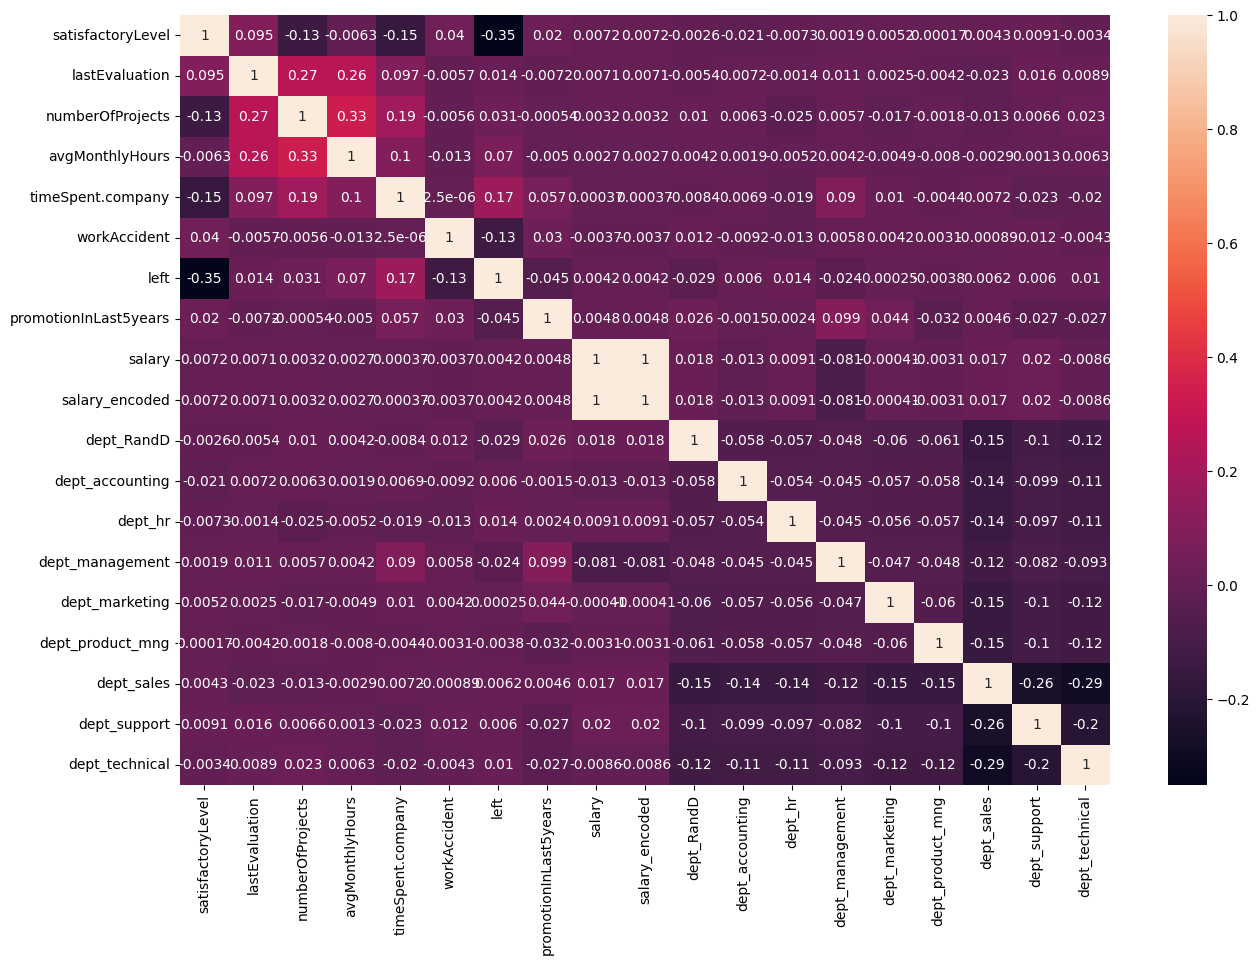

In [11]:
correlation = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation, annot=True)

* The strongest positive correlation is between the features "Age" and "CompTotal". This means that as age increases, compensation also tends to increase.
* The strongest negative correlation is between the features "Age" and "ConvertedComp". This means that as age increases, converted compensation tends to decrease.
* There is a moderate positive correlation between the features "Age" and "WorkWeekHrs". This means that as age increases, the number of hours worked per week also tends to increase.
* There is a moderate negative correlation between the features "Age" and "CodeRevHrs". This means that as age increases, the number of hours spent on code reviews tends to decrease.


In [12]:
# import numpy as np

# # Assuming df is your DataFrame containing the data
# X = df.drop(['left', 'dept_RandD', 'dept_accounting', 'dept_hr', 'dept_management', 
#              'dept_marketing', 'dept_product_mng', 'dept_sales', 'dept_support', 
#              'dept_technical'], axis=1)
# y = df['left']

# # Convert DataFrame to dictionary
# X_dict = X.to_dict(orient='records')

# # Convert int64 to int in the dictionary
# for record in X_dict:
#     for key, value in record.items():
#         if isinstance(value, np.int64):
#             record[key] = int(value)

# # Now X_dict is JSON serializable
# # Pass X_dict and y to jsonify
# return jsonify({'X': X_dict, 'y': y.tolist()})


## Standardization (After split)

In [13]:
# Assuming df is your DataFrame containing the data
X = df.drop(['left'], axis=1)
y = df['left']

# ('dept_RandD', 'dept_accounting', 'dept_hr', 'dept_management', 
#              'dept_marketing', 'dept_product_mng', 'dept_sales', 'dept_support', 
#              'dept_technical')

In [14]:
json_data = X.to_json()
print(json_data)

{"satisfactoryLevel":{"0":0.38,"1":0.8,"2":0.11,"3":0.37,"4":0.41,"5":0.1,"6":0.92,"7":0.42,"8":0.45,"9":0.11,"10":0.36,"11":0.38,"12":0.45,"13":0.78,"14":0.76,"15":0.11,"16":0.09,"17":0.46,"18":0.4,"19":0.89,"20":0.82,"21":0.4,"22":0.38,"23":0.09,"24":0.45,"25":0.4,"26":0.84,"27":0.38,"28":0.45,"29":0.11,"30":0.87,"31":0.1,"32":0.09,"33":0.57,"34":0.43,"35":0.13,"36":0.39,"37":0.1,"38":0.37,"39":0.38,"40":0.1,"41":0.76,"42":0.74,"43":0.09,"44":0.45,"45":0.09,"46":0.11,"47":0.11,"48":0.1,"49":0.4,"50":0.39,"51":0.45,"52":0.79,"53":0.44,"54":0.37,"55":0.1,"56":0.4,"57":0.89,"58":0.09,"59":0.37,"60":0.1,"61":0.1,"62":0.11,"63":0.9,"64":0.38,"65":0.42,"66":0.09,"67":0.71,"68":0.4,"69":0.43,"70":0.09,"71":0.43,"72":0.9,"73":0.37,"74":0.11,"75":0.37,"76":0.46,"77":0.38,"78":0.7,"79":0.09,"80":0.37,"81":0.44,"82":0.31,"83":0.1,"84":0.74,"85":0.73,"86":0.09,"87":0.45,"88":0.11,"89":0.84,"90":0.41,"91":0.11,"92":0.39,"93":0.11,"94":0.45,"95":0.4,"96":0.39,"97":0.83,"98":0.11,"99":0.39,"100":0.

In [15]:
X.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,promotionInLast5years,salary,salary_encoded,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,0.38,0.53,2,157,3,0,0,1,1,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,2,2,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,2,2,0,0,0,0,0,0,1,0,0
3,0.37,0.52,2,159,3,0,0,1,1,0,0,0,0,0,0,1,0,0
4,0.41,0.50,2,153,3,0,0,1,1,0,0,0,0,0,0,1,0,0


In [16]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [18]:
x_train.shape,x_test.shape

((9592, 18), (2399, 18))

In [19]:
y_train.shape,y_test.shape

((9592,), (2399,))

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)



## Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()

lr_model.fit(x_train,y_train)

y_pred = lr_model.predict(x_test)


In [22]:
x_pred = lr_model.predict(x_train)

In [23]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [24]:
x_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## Accuracy Score

In [25]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [26]:
# confusion Metrix
confusion_matrix(y_test,y_pred)

array([[1921,   80],
       [ 316,   82]], dtype=int64)

In [27]:
# Classification report
print('Test Data Report:',classification_report(y_test,y_pred))
print('Train Data Report:',classification_report(y_train,x_pred))

Test Data Report:               precision    recall  f1-score   support

           0       0.86      0.96      0.91      2001
           1       0.51      0.21      0.29       398

    accuracy                           0.83      2399
   macro avg       0.68      0.58      0.60      2399
weighted avg       0.80      0.83      0.80      2399

Train Data Report:               precision    recall  f1-score   support

           0       0.86      0.96      0.91      7999
           1       0.50      0.22      0.30      1593

    accuracy                           0.83      9592
   macro avg       0.68      0.59      0.60      9592
weighted avg       0.80      0.83      0.81      9592



In [28]:
# Accuracy Score
print('Test Data Accuracy_score:',accuracy_score(y_test,y_pred))
print('Train Data Accuracy_Score:',accuracy_score(y_train,x_pred))

Test Data Accuracy_score: 0.834931221342226
Train Data Accuracy_Score: 0.8337155963302753


# Desicion Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier

Dtree = DecisionTreeClassifier()

Dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [30]:
y_pred_dt = Dtree.predict(x_test)
x_pred_dt = Dtree.predict(x_train)

In [31]:
# Classification_Report
print('Test Data report:',classification_report(y_test,y_pred_dt))
print('Train Data Report:',classification_report(y_train,x_pred_dt))

Test Data report:               precision    recall  f1-score   support

           0       0.98      0.98      0.98      2001
           1       0.89      0.92      0.91       398

    accuracy                           0.97      2399
   macro avg       0.94      0.95      0.94      2399
weighted avg       0.97      0.97      0.97      2399

Train Data Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7999
           1       1.00      1.00      1.00      1593

    accuracy                           1.00      9592
   macro avg       1.00      1.00      1.00      9592
weighted avg       1.00      1.00      1.00      9592



In [32]:
# Accuracy Score
print('Test Data Accuracy:',accuracy_score(y_test,y_pred_dt))
print('Train Data Accuracy:',accuracy_score(y_train,x_pred_dt))

Test Data Accuracy: 0.968736973739058
Train Data Accuracy: 1.0


# Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

Rf_model = RandomForestClassifier(n_estimators=100)
Rf_model.fit(x_train,y_train)

y_pred_rf = Rf_model.predict(x_test)
x_pred_rf = Rf_model.predict(x_train)

In [34]:
# Classification_Report
print('Test Data report:',classification_report(y_test,y_pred_rf))
print('Train Data Report:',classification_report(y_train,x_pred_rf))

Test Data report:               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2001
           1       0.99      0.91      0.95       398

    accuracy                           0.98      2399
   macro avg       0.99      0.96      0.97      2399
weighted avg       0.98      0.98      0.98      2399

Train Data Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7999
           1       1.00      1.00      1.00      1593

    accuracy                           1.00      9592
   macro avg       1.00      1.00      1.00      9592
weighted avg       1.00      1.00      1.00      9592



In [35]:
# Accuracy Score
print('Test Data Accuracy:',accuracy_score(y_test,y_pred_rf))
print('Train Data Accuracy:',accuracy_score(y_train,x_pred_rf))

Test Data Accuracy: 0.984160066694456
Train Data Accuracy: 1.0


In [36]:
# Feature Importance

feature_im = pd.Series(Rf_model.feature_importances_, index=X.columns).sort_values(ascending=True)
feature_im

promotionInLast5years    0.001022
dept_product_mng         0.001330
dept_marketing           0.001420
dept_management          0.001455
dept_accounting          0.001732
dept_RandD               0.001805
dept_hr                  0.001835
dept_support             0.002636
dept_sales               0.003216
dept_technical           0.003265
salary                   0.006536
salary_encoded           0.006836
workAccident             0.007808
lastEvaluation           0.132183
avgMonthlyHours          0.158880
timeSpent.company        0.165889
numberOfProjects         0.178751
satisfactoryLevel        0.323401
dtype: float64

In [40]:
from sklearn.metrics import *
def classification_report(X, y, test_size=0.2):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    models = {
        'Logistic Regression': LogisticRegression(),
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier()
    }

    results = {}

    for model_name, model in models.items():
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        results[model_name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-score': f1}

    return results

results = classification_report(X, y)
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"Precision: {metrics['Precision']:.4f}")
    print(f"Recall: {metrics['Recall']:.4f}")
    print(f"F1-score: {metrics['F1-score']:.4f}")
    print()

d:\Machine learning\ML_Env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Accuracy: 0.8320
Precision: 0.4837
Recall: 0.1859
F1-score: 0.2686

Model: Decision Tree
Accuracy: 0.9662
Precision: 0.8819
Recall: 0.9196
F1-score: 0.9004

Model: Random Forest
Accuracy: 0.9842
Precision: 0.9918
Recall: 0.9121
F1-score: 0.9503



In [41]:

def highest_model_accuracy(df):
    x = df.drop(columns=['left','salary'])  # Assuming 'left' column contains the target variable
    y = df['left']

    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

    models = {
        'Logistic Regression': LogisticRegression(),
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier()
    }

    highest_accuracies = {}

    for model_name, model in models.items():
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)

        highest_accuracies[model_name] = accuracy

    best_model = max(highest_accuracies, key=highest_accuracies.get)
    best_accuracy = highest_accuracies[best_model]

    return best_model, best_accuracy

best_model, best_accuracy = highest_model_accuracy(df)
print(f"Best Model: {best_model}")
print(f"Highest Accuracy: {best_accuracy:.4f}")


d:\Machine learning\ML_Env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best Model: Random Forest
Highest Accuracy: 0.9857


In [42]:
def backward_feature_elimination(df, target_col, model, test_size=0.25, random_state=None):
    # Extract features and target
    x = df.drop(columns=['left','salary'])  # Assuming 'left' column contains the target variable
    y = df['left']

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Initial accuracy with all features
    model.fit(X_train, y_train)
    y_pred_initial = model.predict(X_test)
    accuracy_initial = accuracy_score(y_test, y_pred_initial)
    print(f"Initial Accuracy with all features: {accuracy_initial:.4f}")

    # Track best accuracy and corresponding feature set
    best_accuracy = accuracy_initial
    best_features = list(x.columns)

    # Iterate until accuracy stops changing
    while True:
        # Get feature importances
        model.fit(X_train, y_train)
        importances = model.feature_importances_

        # Identify the least important feature
        least_important_idx = np.argmin(importances)
        least_important_feature = x.columns[least_important_idx]
        print(f"Removing least important feature: {least_important_feature}")

        # Remove the least important feature
        X_train.drop(columns=[least_important_feature], axis=1, inplace=True)
        X_test = X_test.drop(columns=[least_important_feature])

        # Retrain the model and calculate accuracy
        model.fit(X_train, y_train)
        y_pred_new = model.predict(X_test)
        accuracy_new = accuracy_score(y_test, y_pred_new)
        print(f"New Accuracy after feature elimination: {accuracy_new:.4f}")

        # Check if accuracy has changed significantly
        if np.isclose(accuracy_new, best_accuracy, atol=1e-5):
            print("Accuracy no longer improving. Stopping feature elimination.")
            break

        # Update best accuracy and feature set
        best_accuracy = accuracy_new
        best_features.remove(least_important_feature)

    # Return the best accuracy and corresponding feature set
    return best_accuracy, best_features
# Specify the target column and model (e.g., RandomForestClassifier)
target_col = 'left'
model = RandomForestClassifier(n_estimators=150,random_state=42)

best_accuracy, best_features = backward_feature_elimination(df, target_col, model)

print(f"Best Accuracy after feature elimination: {best_accuracy:.4f}")
print("Best Features:", best_features)


Initial Accuracy with all features: 0.9857
Removing least important feature: dept_sales
New Accuracy after feature elimination: 0.9867
Removing least important feature: promotionInLast5years
New Accuracy after feature elimination: 0.9860
Removing least important feature: dept_product_mng
New Accuracy after feature elimination: 0.9847
Removing least important feature: dept_management
New Accuracy after feature elimination: 0.9863
Removing least important feature: dept_RandD
New Accuracy after feature elimination: 0.9853
Removing least important feature: dept_accounting
New Accuracy after feature elimination: 0.9863
Removing least important feature: dept_RandD


KeyError: "['dept_RandD'] not found in axis"

## Save the Modules


In [43]:
import pickle
pickle.dump(Rf_model,open('randomForest.pkl','wb'))
# pickle.dump(scaler,open('StandarScaler.pkl','wb'))

In [44]:
X.columns

Index(['satisfactoryLevel', 'lastEvaluation', 'numberOfProjects',
       'avgMonthlyHours', 'timeSpent.company', 'workAccident',
       'promotionInLast5years', 'salary', 'salary_encoded', 'dept_RandD',
       'dept_accounting', 'dept_hr', 'dept_management', 'dept_marketing',
       'dept_product_mng', 'dept_sales', 'dept_support', 'dept_technical'],
      dtype='object')

In [36]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11991 entries, 0 to 11990
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfactoryLevel      11991 non-null  float64
 1   lastEvaluation         11991 non-null  float64
 2   numberOfProjects       11991 non-null  int64  
 3   avgMonthlyHours        11991 non-null  int64  
 4   timeSpent.company      11991 non-null  int64  
 5   workAccident           11991 non-null  int64  
 6   promotionInLast5years  11991 non-null  int64  
 7   salary                 11991 non-null  int64  
 8   salary_encoded         11991 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 843.2 KB


In [ ]:
import joblib
import json

def pickle_to_json(pickle_file, json_file):
    # Load the pickled model
    model = joblib.load(pickle_file)

    # Convert model to JSON-serializable format if necessary
    # In this example, let's assume the model doesn't need further conversion

    # Save model parameters to JSON file
    with open(json_file, 'w') as f:
        json.dump(model.get_params(), f)

# Convert randomForest.pkl to JSON
pickle_to_json('randomForest.pkl', 'randomForest.json')

# Convert StandarScaler.pkl to JSON
pickle_to_json('StandarScaler.pkl', 'StandarScaler.json')
